In [ ]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
dataset_path = '/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24'

In [ ]:
# Function to extract features from each audio file
def extract_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to extract features from each audio file without silent moments
def extract_features_trim(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    audio, index = librosa.effects.trim(audio, top_db=20, frame_length=512, hop_length=256)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):

                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'

                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features(file_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Function for displaying confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix For {}'.format(title))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [ ]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 30)
Shape of y: (1440,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM model
svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.66      0.75      0.70        36
        Calm       0.44      0.66      0.53        41
     Disgust       0.38      0.44      0.41        34
     Fearful       0.58      0.54      0.56        39
       Happy       0.47      0.42      0.44        36
     Neutral       0.38      0.14      0.20        22
         Sad       0.41      0.38      0.39        40
   Surprised       0.58      0.47      0.52        40

    accuracy                           0.49       288
   macro avg       0.49      0.47      0.47       288
weighted avg       0.49      0.49      0.48       288



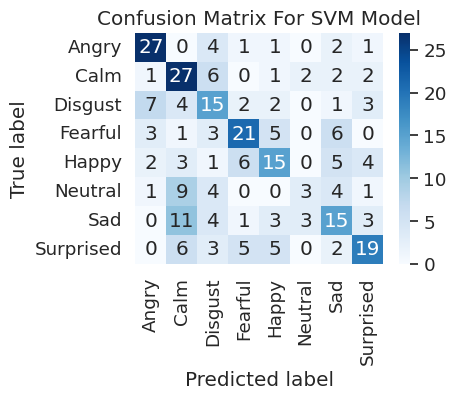

In [ ]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'SVM Model')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.47      0.81      0.59        36
        Calm       0.47      0.83      0.60        41
     Disgust       0.38      0.44      0.41        34
     Fearful       0.44      0.31      0.36        39
       Happy       0.43      0.33      0.38        36
     Neutral       0.40      0.27      0.32        22
         Sad       0.48      0.28      0.35        40
   Surprised       0.48      0.25      0.33        40

    accuracy                           0.45       288
   macro avg       0.44      0.44      0.42       288
weighted avg       0.45      0.45      0.42       288



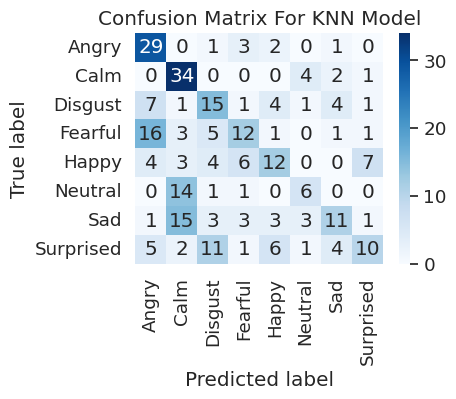

In [ ]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'KNN Model')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=29)
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.46      0.53      0.49        36
        Calm       0.55      0.56      0.55        41
     Disgust       0.36      0.35      0.36        34
     Fearful       0.41      0.33      0.37        39
       Happy       0.29      0.31      0.30        36
     Neutral       0.37      0.32      0.34        22
         Sad       0.31      0.40      0.35        40
   Surprised       0.41      0.33      0.36        40

    accuracy                           0.40       288
   macro avg       0.39      0.39      0.39       288
weighted avg       0.40      0.40      0.39       288



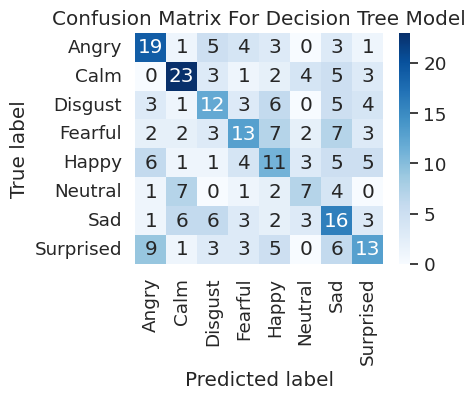

In [ ]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Decision Tree Model')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.62      0.69      0.66        36
        Calm       0.55      0.83      0.66        41
     Disgust       0.56      0.68      0.61        34
     Fearful       0.51      0.51      0.51        39
       Happy       0.65      0.56      0.60        36
     Neutral       0.64      0.32      0.42        22
         Sad       0.55      0.42      0.48        40
   Surprised       0.70      0.57      0.63        40

    accuracy                           0.59       288
   macro avg       0.60      0.57      0.57       288
weighted avg       0.59      0.59      0.58       288



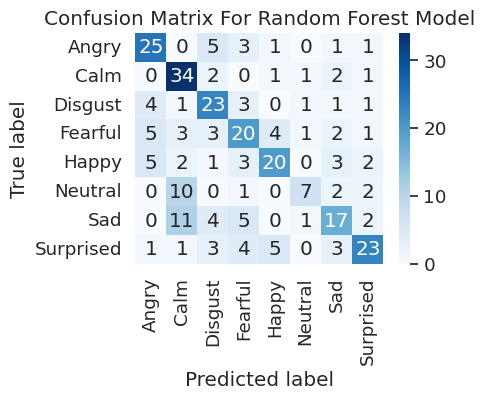

In [ ]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Random Forest Model')

In [ ]:
m1=RandomForestClassifier()
m2=SVC()
m3=DecisionTreeClassifier()

In [ ]:
# Declaring Modelling score (Yang paling terbaik)
from sklearn.ensemble import VotingClassifier
from sklearn.multioutput import MultiOutputClassifier
model5=VotingClassifier([('md2',m1),('m2trim',m2),('m3trim',m3)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model5.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
model5.score(X_train,y_train)

1.0

In [ ]:
model5.score(X_test,y_test)

0.4756944444444444

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#decode dataset
OHE = OneHotEncoder()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29, test_size=0.25, shuffle=True)
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (1080, 30)
y_train: (1080, 8)
X_test: (360, 30)
y_test: (360, 8)


In [ ]:
SS = StandardScaler()

X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 30, 1)
X_test: (360, 30, 1)


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# Function to plot Training Accuracy vs Validation Accuracy
def TrainVal_plot(history):
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']

    epochs = range(1, early_stop.stopped_epoch+2)
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
    plt.title('Training vs. Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Implementing hidden Layer in CNN
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define input shape
input_shape = (X_train.shape[1], 1)

# Create model
model = Sequential()


model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))

# Compile model with appropriate loss function, optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 256)           98560     
                                                                 
 flatten (Flatten)           (None, 5632)              0         
                                                                 
 dense (Dense)               (None, 128)               721024    
                                                                 
 dropout (Dropout)           (None, 128)               0

In [ ]:
history = model.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                       callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 3s 37ms/step - loss: 1.9596 - accuracy: 0.2028 - val_loss: 1.9043 - val_accuracy: 0.2722
Epoch 2/300
34/34 [==============================] - 1s 30ms/step - loss: 1.7250 - accuracy: 0.3583 - val_loss: 1.7628 - val_accuracy: 0.3722
Epoch 3/300
34/34 [==============================] - 1s 28ms/step - loss: 1.5073 - accuracy: 0.4435 - val_loss: 1.6388 - val_accuracy: 0.4000
Epoch 4/300
34/34 [==============================] - 1s 28ms/step - loss: 1.2859 - accuracy: 0.5324 - val_loss: 1.5741 - val_accuracy: 0.4833
Epoch 5/300
34/34 [==============================] - 1s 29ms/step - loss: 1.1281 - accuracy: 0.5981 - val_loss: 1.3641 - val_accuracy: 0.5000
Epoch 6/300
34/34 [==============================] - 2s 49ms/step - loss: 0.9358 - accuracy: 0.6741 - val_loss: 1.3666 - val_accuracy: 0.5500
Epoch 7/300
34/34 [==============================] - 2s 49ms/step - loss: 0.7691 - accuracy: 0.7213 - val_loss: 1.3288 - val_accuracy: 0.5639
Epoch 

In [ ]:
print("Accuracy of our model on test data : " , round(model.evaluate(X_test,y_test)[1]*100,2) , "%")

12/12 [==============================] - 0s 6ms/step - loss: 2.1489 - accuracy: 0.6222
Accuracy of our model on test data :  62.22 %


In [ ]:
print("Accuracy of our model on Train data : " , round(model.evaluate(X_train,y_train)[1]*100,2) , "%")

34/34 [==============================] - 0s 7ms/step - loss: 0.0076 - accuracy: 0.9991
Accuracy of our model on Train data :  99.91 %


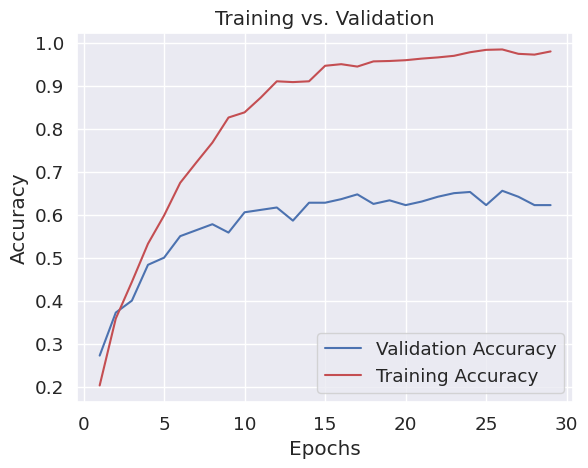

In [ ]:
TrainVal_plot(history)